Создаем графики и отображаем их

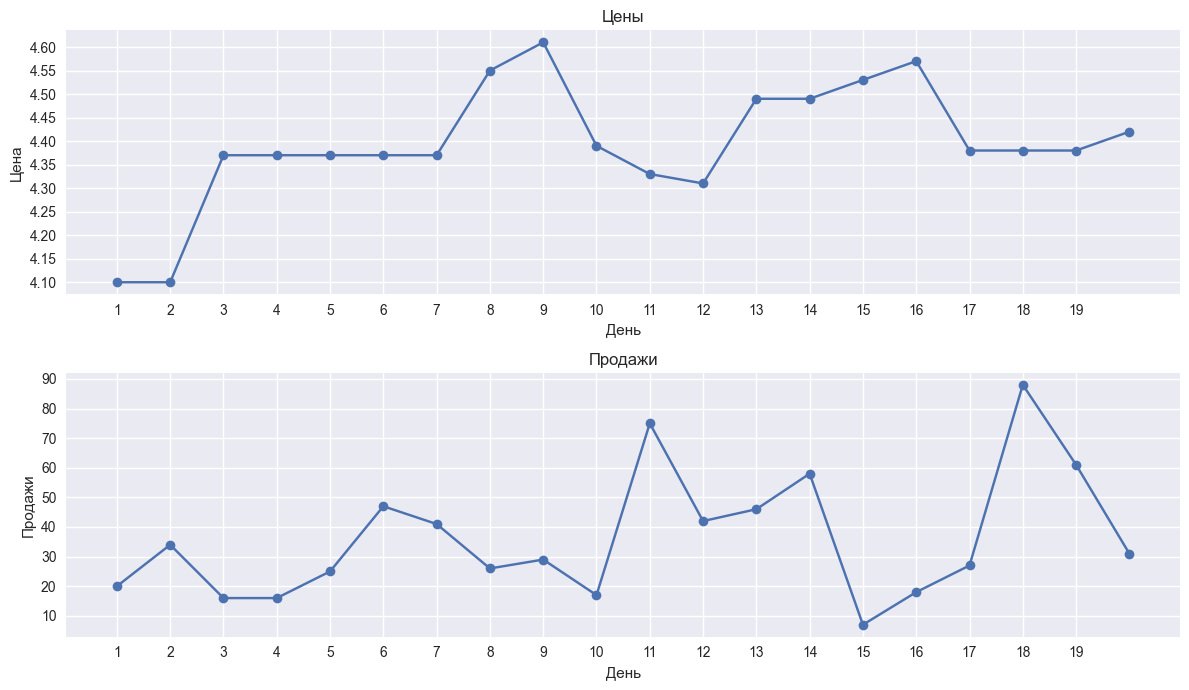

In [234]:
import csv
from math import sqrt, log10, floor, ceil

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.distributions.empirical_distribution import ECDF

plt.style.use('seaborn-v0_8')
with open("DemoSet.csv", newline='\n') as fp:
    reader = csv.reader(fp, delimiter=';', )
    data = [row for row in reader]
    title = data[0]
    data = data[1:]

dates = [i for i in range(1, 21)]
prices = [float(row[1].replace(',', '.')) for row in data]
sales = [int(row[2]) for row in data]

fig, ax = plt.subplots(2, 1, figsize=(12, 7))

price_plot = ax[0]
price_plot.plot(dates, prices, marker='o', label='Цена')

price_plot.set_xlabel(title[0])
price_plot.set_ylabel(title[1])
price_plot.set_title('Цены')
price_plot.set_xticks(np.arange(min(dates), max(dates), 1))

price_plot.locator_params('y', nbins=len(set(prices)))

ax[0] = price_plot
price_plot.grid(True)

sales_plot = ax[1]
sales_plot.plot(dates, sales, marker='o', label='Продажи')

sales_plot.set_xlabel(title[0])
sales_plot.set_ylabel(title[2])
sales_plot.set_title('Продажи')
sales_plot.set_xticks(np.arange(min(dates), max(dates), 1))

ax[1] = sales_plot
sales_plot.grid(True)
fig.tight_layout()
plt.show()

Определим и нанесем на график среднее значение (математическое ожидание (М(Х)), значение медианы (Ме) и моды (Мо).

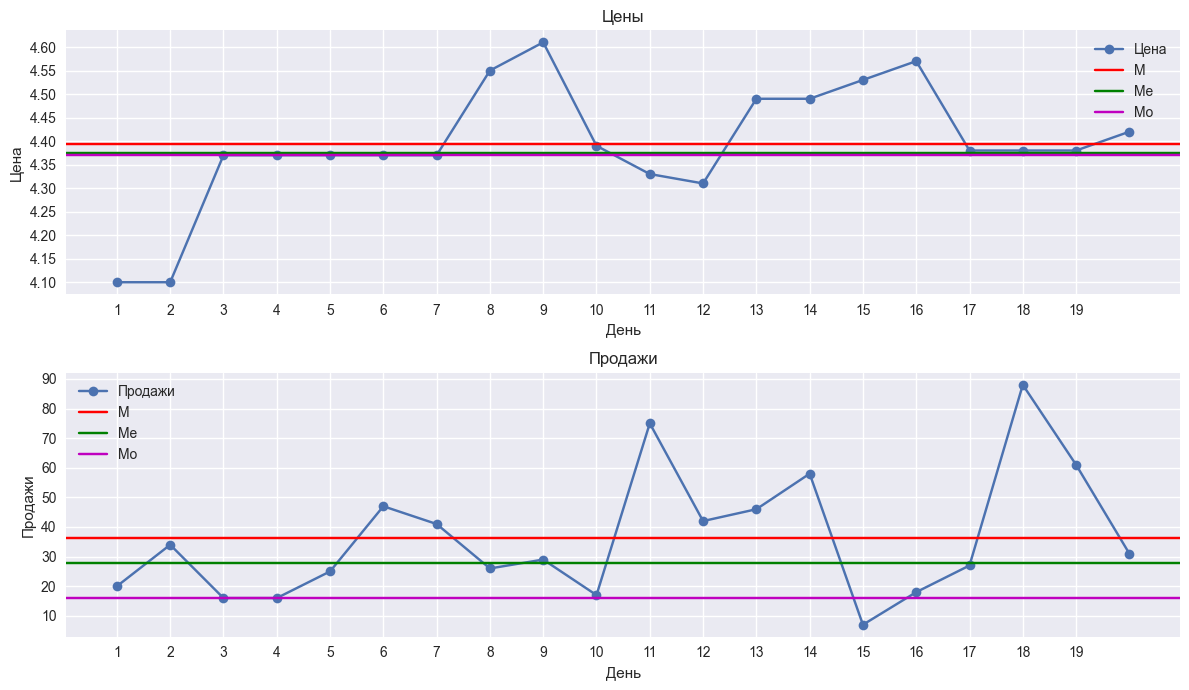

In [235]:
n = len(prices)
prices_sorted = sorted(prices)
sales_sorted = sorted(sales)
M_price = sum(prices) / len(prices)
M_sales = sum(sales) / len(sales)

Me_price = (prices_sorted[n // 2 - 2] + prices_sorted[n // 2 - 1]) / 2
Me_sales = (sales_sorted[n // 2 - 2] + sales_sorted[n // 2 - 1]) / 2

Mo_price = max(prices, key=prices.count)
Mo_sales = max(sales, key=sales.count)
# Отображаем выведенные значения на графике
price_plot.axhline(y=M_price, color='r', label='M')
price_plot.axhline(y=Me_price, color='g', label='Me')
price_plot.axhline(y=Mo_price, color='m', label='Mo')

sales_plot.axhline(y=M_sales, color='r', label='M')
sales_plot.axhline(y=Me_sales, color='g', label='Me')
sales_plot.axhline(y=Mo_sales, color='m', label='Mo')

price_plot.legend(fontsize=10, shadow=True)
sales_plot.legend(fontsize=10, shadow=True)
fig.tight_layout()
fig

Считаем среднее геометрическое, гармоническое значение, дисперсию и среднеквадратичное отклонение для цен и продаж

In [236]:
avg_geom_price = 1
for price in prices:
    avg_geom_price *= price
avg_geom_price = avg_geom_price ** (1 / n)

avg_geom_sale = 1
for sale in sales:
    avg_geom_sale *= sale
avg_geom_sale = avg_geom_sale ** (1 / n)

# Гармоничные значения
try:
    har_sum = 0
    for price in prices:
        har_sum += 1 / price
    har_price = n / har_sum
except:
    har_price = None

try:
    har_sum = 0
    for sale in sales:
        har_sum += 1 / sale
    har_sale = n / har_sum
except:
    har_sale = None

# Дисперсия
D_sum = 0
for price in prices:
    D_sum += (M_price - price) ** 2
D_price = D_sum / n

D_sum = 0
for sale in sales:
    D_sum += (M_sales - sale) ** 2
D_sale = D_sum / n

# Среднеквадратичное отклонение
SD_price = sqrt(D_price)
SD_sale = sqrt(D_sale)
print('Цена:')
print(f'Среднее геометрическое: {avg_geom_price}\n'
      f'Гармоническое значение: {har_price}\n'
      f'Дисперсия: {D_price}\n'
      f'Среднее квадратичное отклонение: {SD_price}\n')

print('Продажи:')
print(f'Среднее геометрическое: {avg_geom_sale}\n'
      f'Гармоническое значение: {har_sale}\n'
      f'Дисперсия: {D_sale}\n'
      f'Среднее квадратичное отклонение: {SD_sale}\n')

Цена:
Среднее геометрическое: 4.392112236614928
Гармоническое значение: 4.390196681054201
Дисперсия: 0.016354000000000042
Среднее квадратичное отклонение: 0.12788275880665087

Продажи:
Среднее геометрическое: 30.58016243057493
Гармоническое значение: 25.206864014942564
Дисперсия: 428.86
Среднее квадратичное отклонение: 20.70893526958834


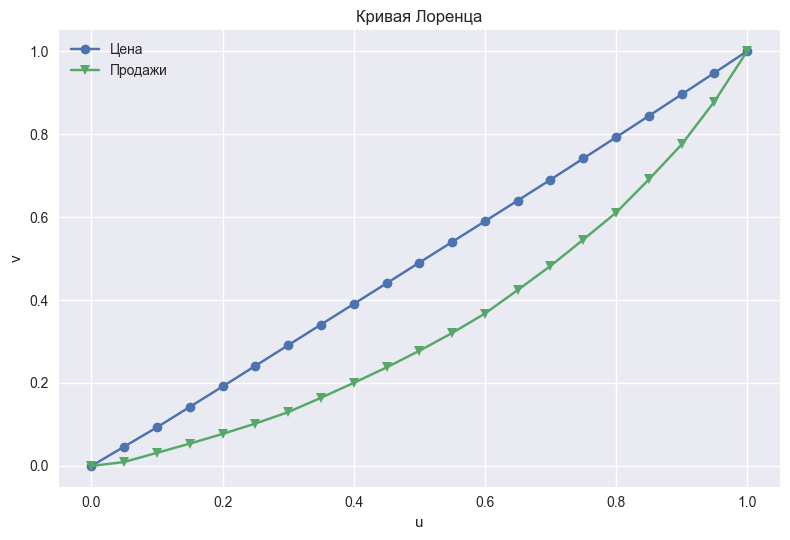

In [237]:
# Строим кривую Лоренца
u = [0]
v_price = [0]
v_sale = [0]

for j in range(1, 21):
    u.append(j / n)
    v_price.append(sum(sorted(prices)[:j]) / sum(prices))
    v_sale.append((sum(sorted(sales)[:j])) / sum(sales))

plt.plot(u, v_price, marker='o', label='Цена')
plt.plot(u, v_sale, marker='v', label='Продажи')

plt.xlabel('u')
plt.ylabel('v')
plt.title('Кривая Лоренца')
plt.grid(True)

plt.legend(fontsize=10, shadow=True)
plt.tight_layout()
plt.show()

Считаем значение коэффициента Джинни и индекса Херфиндаля

In [238]:
G_price = ((2 * sum([(i + 1) * prices_sorted[i] for i in range(n)])) / (
        n * sum(prices))) - ((n + 1) / n)
H_price = sum([(price / sum(prices)) ** 2 for price in prices])

G_sale = ((2 * sum([dates[i] * sales_sorted[i] for i in range(n)])) / (
        n * sum(sales))) - ((n + 1) / n)
H_sale = sum([(sale / sum(sales)) ** 2 for sale in sales])

print('Цена:')
print(f'Коэффициент Джинни: {G_price}\n'
      f'Индекс Херфиндаля: {H_price}\n')

print('Продажи:')
print(f'Коэффициент Джинни: {G_sale}\n'
      f'Индекс Херфиндаля: {H_sale}\n')

Цена:
Коэффициент Джинни: 0.015225307237141772
Индекс Херфиндаля: 0.05004235199694045

Продажи:
Коэффициент Джинни: 0.3121546961325967
Индекс Херфиндаля: 0.06636320625133542


Строим вариационный ряд, 

# Вторая лабораторная

## Строим вариационный ряд, частотную таблицу и интервальный ряд

In [239]:
df = pd.DataFrame({' ': dates, 'Цены': prices_sorted, 'Продажи': sales_sorted})
#print(df.to_string(index=False))
print('\nЧастотная таблица для цен:')
frequency_prices = pd.crosstab(index=df['Цены'], columns='Повторения')

frequency_prices['Частота'] = frequency_prices / len(dates)
print(frequency_prices)

print('\nЧастотная таблица для продаж:')
frequency_sales = pd.crosstab(index=df['Продажи'], columns='Повторения')

frequency_sales['Частота'] = frequency_sales / len(dates)
print(frequency_sales)


Частотная таблица для цен:
col_0  Повторения  Частота
Цены                      
4.10            2     0.10
4.31            1     0.05
4.33            1     0.05
4.37            5     0.25
4.38            3     0.15
4.39            1     0.05
4.42            1     0.05
4.49            2     0.10
4.53            1     0.05
4.55            1     0.05
4.57            1     0.05
4.61            1     0.05

Частотная таблица для продаж:
col_0    Повторения  Частота
Продажи                     
7                 1     0.05
16                2     0.10
17                1     0.05
18                1     0.05
20                1     0.05
25                1     0.05
26                1     0.05
27                1     0.05
29                1     0.05
31                1     0.05
34                1     0.05
41                1     0.05
42                1     0.05
46                1     0.05
47                1     0.05
58                1     0.05
61                1     0.05
75          

## Строим интервальный ряд

In [240]:
# Количество интервалов
k = 1 + floor(3.32 * log10(len(prices)))
# Ширина интервала
h_price = round((max(prices) - min(prices)) / k, 6)
h_sales = round((max(sales) - min(sales)) / k, 6)
print(f'h цены: {h_price}')
print(f'h продаж: {h_sales}')
# Создаем интервальный ряд
# Создаем интервальный ряд
intervals_price = pd.interval_range(start=df['Цены'].min(),
                                    end=df['Цены'].max(),
                                    freq=h_price + 0.00000000000001,
                                    closed='left')

intervals_sales = pd.interval_range(start=df['Продажи'].min(),
                                    end=df['Продажи'].max(),
                                    freq=h_sales + 0.00000000000001,
                                    closed='left')


def round_intervals(inter: pd.Interval):
    if round(inter.right, 6) == max(df['Цены']) or round(inter.right, 6) == max(
            df['Продажи']):
        return pd.Interval(round(inter.left, 6), round(inter.right, 6), 'both')
    return pd.Interval(round(inter.left, 6), round(inter.right, 6),
                       inter.closed)


# Группируем данные по интервалам
df['Цены_интервал'] = pd.cut(df['Цены'], bins=intervals_price, right=True)
df['Цены_интервал'] = df['Цены_интервал'].apply(lambda x: round_intervals(x))
frequency_prices_interval = df.groupby('Цены_интервал', observed=False).size()

# Вычисляем относительную частоту
frequency_prices_normalized = frequency_prices_interval / n

# Аналогично для продаж
df['Продажи_интервал'] = pd.cut(df['Продажи'], bins=intervals_sales, right=True)
df['Продажи_интервал'] = df['Продажи_интервал'].apply(
    lambda x: round_intervals(x))
frequency_sales_interval = df.groupby('Продажи_интервал', observed=False).size()
frequency_sales_normalized = frequency_sales_interval / n

# Выводим результаты
print("Интервальный ряд для цен:")
print(frequency_prices_normalized)

print("\nИнтервальный ряд для продаж:")
print(frequency_sales_normalized)
print(type(frequency_sales_normalized))


h цены: 0.102
h продаж: 16.2
Интервальный ряд для цен:
Цены_интервал
[4.1, 4.202)      0.10
[4.202, 4.304)    0.00
[4.304, 4.406)    0.55
[4.406, 4.508)    0.15
[4.508, 4.61]     0.20
dtype: float64

Интервальный ряд для продаж:
Продажи_интервал
[7.0, 23.2)     0.3
[23.2, 39.4)    0.3
[39.4, 55.6)    0.2
[55.6, 71.8)    0.1
[71.8, 88.0]    0.1
dtype: float64
<class 'pandas.core.series.Series'>


# Строим Полигоны частот

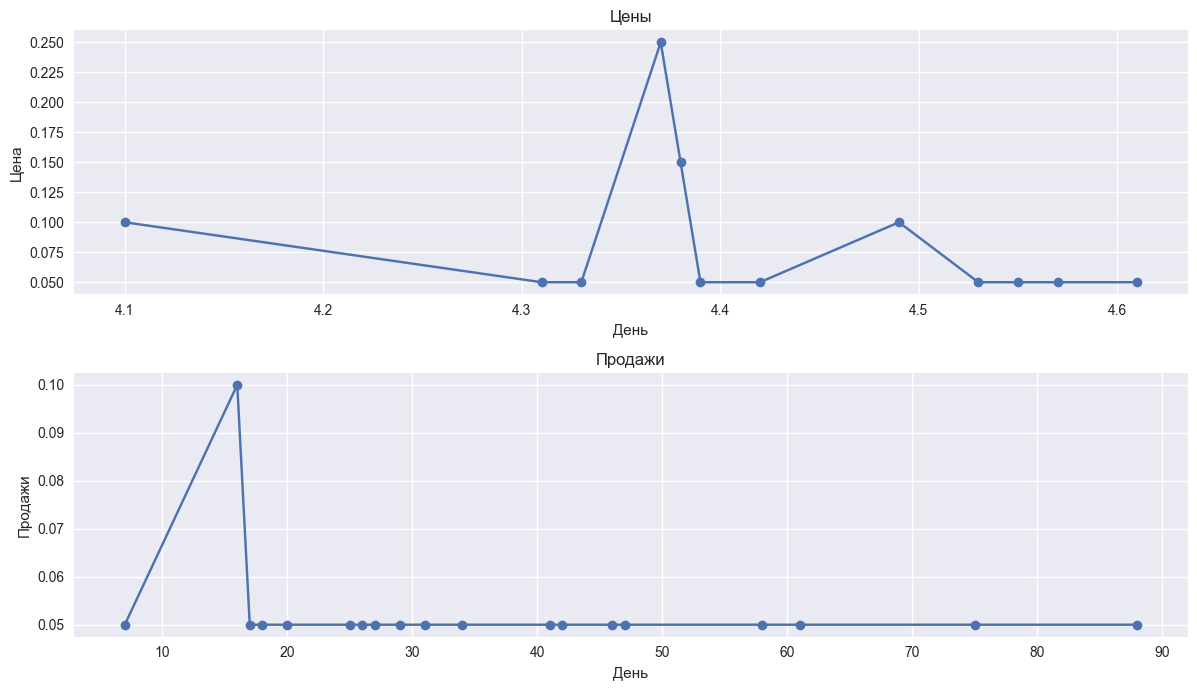

In [241]:

fig, ax = plt.subplots(2, 1, figsize=(12, 7))
price_plot = ax[0]
price_plot.plot(sorted(list(set(prices))), frequency_prices['Частота'],
                marker='o', label='Полигон частот для цены')

price_plot.set_xlabel(title[0])
price_plot.set_ylabel(title[1])
price_plot.set_title('Цены')

ax[0] = price_plot
price_plot.grid(True)

sales_plot = ax[1]
sales_plot.plot(sorted(list(set(sales))), frequency_sales['Частота'],
                marker='o', label='Полигон частот для продаж')

sales_plot.set_xlabel(title[0])
sales_plot.set_ylabel(title[2])
sales_plot.set_title('Продажи')

ax[1] = sales_plot
sales_plot.grid(True)
fig.tight_layout()
plt.show()

# Строим гистограмму интервального ряда

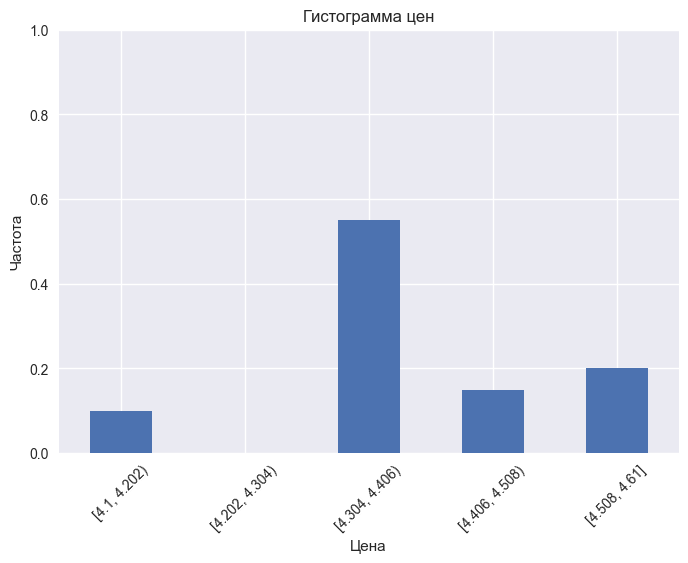

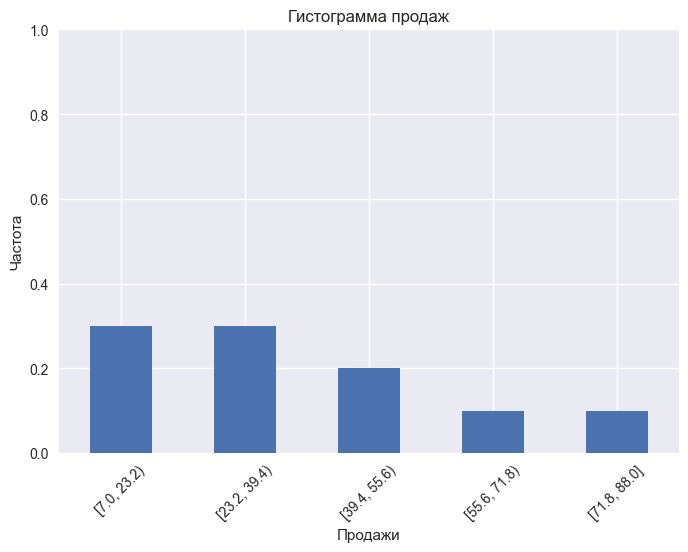

In [242]:
frequency_prices_normalized.sort_index().plot(kind='bar')
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.title('Гистограмма цен')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

# Создаем гистограмму для продаж
frequency_sales_normalized.sort_index().plot(kind='bar')
plt.xlabel('Продажи')
plt.ylabel('Частота')
plt.title('Гистограмма продаж')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

0.0 x<-inf
0.1 x<4.1
0.15 x<4.31
0.2 x<4.33
0.45 x<4.37
0.6 x<4.38
0.65 x<4.39
0.7 x<4.42
0.8 x<4.49
0.85 x<4.53
0.9 x<4.55
0.95 x<4.57
1.0 x<4.61


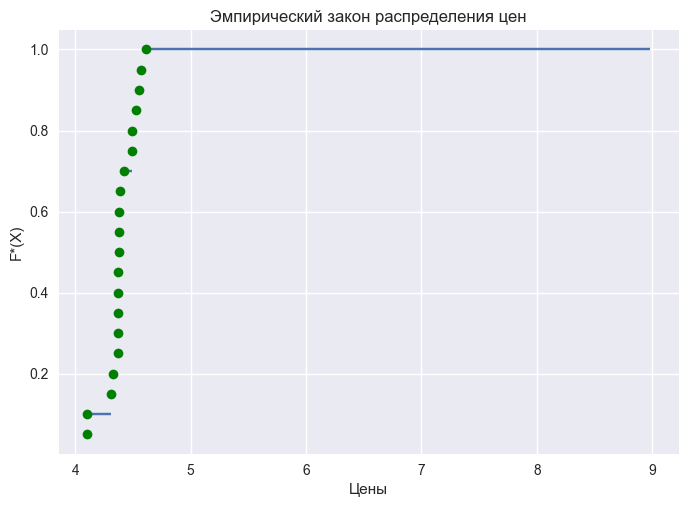

0.0 x<-inf
0.05 x<7.0
0.15 x<16.0
0.2 x<17.0
0.25 x<18.0
0.3 x<20.0
0.35 x<25.0
0.4 x<26.0
0.45 x<27.0
0.5 x<29.0
0.55 x<31.0
0.6 x<34.0
0.65 x<41.0
0.7 x<42.0
0.75 x<46.0
0.8 x<47.0
0.85 x<58.0
0.9 x<61.0
0.95 x<75.0
1.0 x<88.0


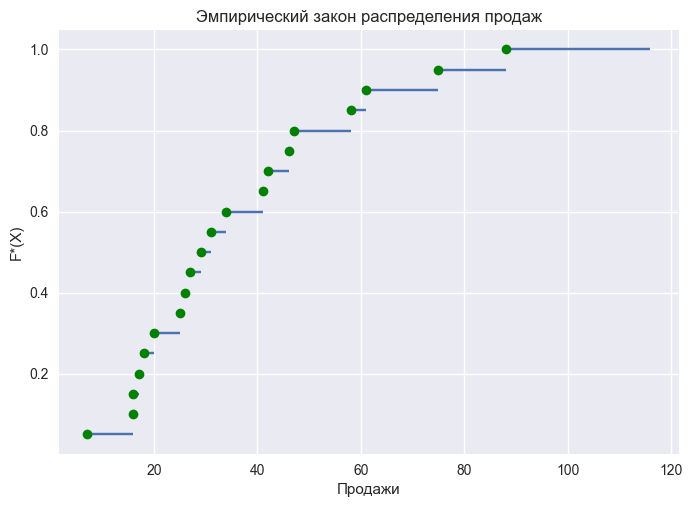

In [243]:
ecdf_prices = ECDF(df['Цены'])
ecdf_dict_prices = {}

xmax = [i for i in ecdf_prices.x] + [max(prices) + Me_price]

plt.hlines(y=sorted(set(ecdf_prices.y)), xmin=ecdf_prices.x, xmax=xmax[1:])
plt.grid(True)
for x, y in zip(ecdf_prices.x, ecdf_prices.y):
    ecdf_dict_prices[f'x<{x}'] = round(y, 6)
    plt.plot(x, y, 'go')
for k, v in ecdf_dict_prices.items():
    print(v, k)
plt.xlabel('Цены')
plt.ylabel('F*(X)')
plt.title('Эмпирический закон распределения цен')
plt.show()

ecdf_sales = ECDF(df['Продажи'])
ecdf_dict_sales = {}

xmax = [i for i in ecdf_sales.x] + [max(sales) + Me_sales]

plt.hlines(y=sorted(set(ecdf_sales.y)), xmin=ecdf_sales.x, xmax=xmax[1:])
plt.grid(True)
for x, y in zip(ecdf_sales.x, ecdf_sales.y):
    ecdf_dict_sales[f'x<{x}'] = round(y, 6)
    plt.plot(x, y, 'go')
for k, v in ecdf_dict_sales.items():
    print(v, k)
plt.xlabel('Продажи')
plt.ylabel('F*(X)')
plt.title('Эмпирический закон распределения продаж')
plt.show()

## Энтропия временного ряда

In [244]:
from numpy import log


def calc_entropy(column):
    result = 0
    for i in column:
        if i == 0:
            return None
        result -= i * log(i)
    return result


print('Энтропия по частотным таблицам')
print('Для цен: ', calc_entropy(frequency_prices['Частота']))
print('Для продаж: ', calc_entropy(frequency_sales['Частота']))

print('\nЭнтропия по интервалам (для гистограммы)')
print('Для цен: ', calc_entropy(frequency_prices_normalized))
print('Для продаж: ', calc_entropy(frequency_sales_normalized))

print('\nЭнтропия по теоретическим законам распределения')
print('Для цен: ', calc_entropy(list(ecdf_dict_prices.values())[1:]))
print('Для продаж: ', calc_entropy(list(ecdf_dict_sales.values())[1:]))

Энтропия по частотным таблицам
Для цен:  2.28995151603326
Для продаж:  2.9264175554979963

Энтропия по интервалам (для гистограммы)
Для цен:  None
Для продаж:  1.5047882836811908

Энтропия по теоретическим законам распределения
Для цен:  2.4924283081785994
Для продаж:  4.744821375493249


## Box-plot диаграмма

            Q5    Q25    Q50    Q75    Q95    IQR  Q25-1.5*IQR  Q75+1.5*IQR    Min    Max
   Цена    4.1   4.37   4.38   4.49   4.57   0.12         4.19         4.67   4.31   4.61
Продажи    7.0  18.00  29.00  46.00  75.00  28.00       -24.00        88.00   7.00  75.00


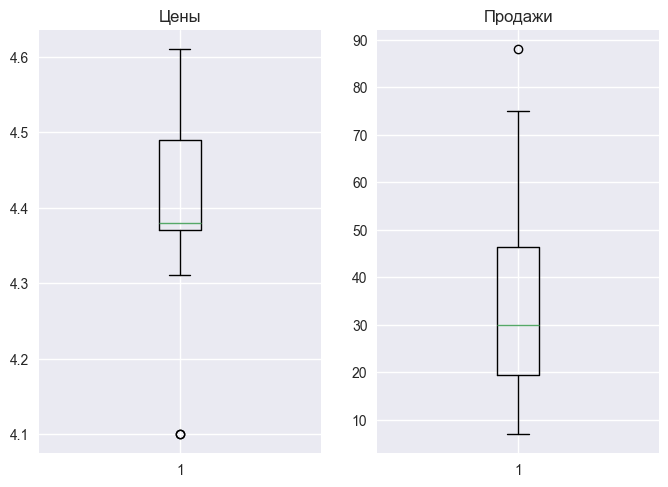

In [245]:
boxplot_data = pd.DataFrame()
boxplot_data[' '] = ['Цена', 'Продажи']
for i in [5, 25, 50, 75, 95]:
    index1, index2 = ceil(n * i / 100) - 1, floor(n * i / 100) - 1
    if index1 == index2:
        boxplot_data[f'Q{i}'] = [prices_sorted[index1],
                                 sales_sorted[index1]]
    else:
        res = []
        for part in [prices_sorted, sales_sorted]:
            res.append(round((part[index1] + part[index2]) / 2, 6))
        boxplot_data[f'Q{i}'] = res

boxplot_data['IQR'] = boxplot_data['Q75'] - boxplot_data['Q25']
boxplot_data['Q25-1.5*IQR'] = boxplot_data['Q25'] - 1.5 * boxplot_data['IQR']
boxplot_data['Q75+1.5*IQR'] = boxplot_data['Q75'] + 1.5 * boxplot_data['IQR']
boxplot_data['Min'] = [
    min([i for i in prices if i > boxplot_data['Q25-1.5*IQR'][0]]),
    min([i for i in sales if i > boxplot_data['Q25-1.5*IQR'][1]])]
boxplot_data['Max'] = [
    max([i for i in prices if i < boxplot_data['Q75+1.5*IQR'][0]]),
    max([i for i in sales if i < boxplot_data['Q75+1.5*IQR'][1]])]
fig, axs = plt.subplots(1, 2)
axs[0].boxplot(df['Цены'])
axs[0].set_title('Цены')
axs[1].boxplot(df['Продажи'])
axs[1].set_title('Продажи')
print(boxplot_data.to_string(index=False, col_space=6))
plt.show()

# Третья лабораторная

## Строим функцию Лагранжа

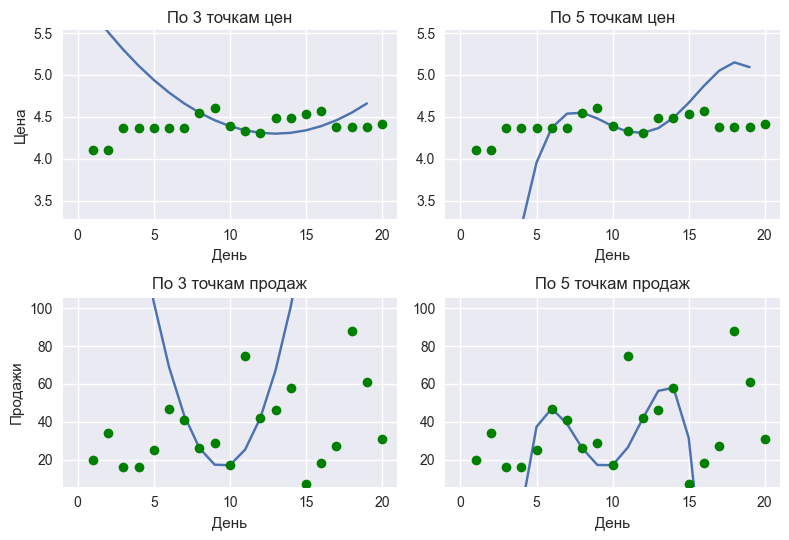

In [246]:
days3 = [8, 10, 12]
days5 = [6, 8, 10, 12, 14]


def build_lagrange_func(data_trg, days: list):
    x_cur = np.linspace(start=0, stop=19, num=20)
    res_y = 0
    for i in days:

        curr_days = days.copy()
        curr_days.remove(i)
        y = data_trg[i - 1]
        for j in range(len(curr_days)):
            y *= (x_cur - curr_days[j]) / (i - curr_days[j])
        res_y += y
    return x_cur, res_y


fig1, axs = plt.subplots(2, 2)
datas = [prices, sales]
days_arg = [days3, days5]
for i in range(2):
    for j in range(2):
        x, y = build_lagrange_func(datas[i], days_arg[j])
        axs[i][j].plot(x, y)
        axs[i][j].grid(True)
        axs[i][j].set_ylim(min(datas[i]) * 0.8, max(datas[i]) * 1.2)
        axs[i][j].set_xlabel('День')
for x, y in zip(dates, prices):
    axs[0][0].plot(x, y, 'go')
    axs[0][1].plot(x, y, 'go')
for x, y in zip(dates, sales):
    axs[1][0].plot(x, y, 'go')
    axs[1][1].plot(x, y, 'go')
axs[0][0].set_title('По 3 точкам цен')
axs[0][1].set_title('По 5 точкам цен')
axs[1][0].set_title('По 3 точкам продаж')
axs[1][1].set_title('По 5 точкам продаж')
axs[0][0].set_ylabel('Цена')
axs[1][0].set_ylabel('Продажи')
plt.tight_layout()
plt.show()

## Цены и продажи для 5 и 15 дней многочленом Ньютона

In [247]:
def third_neuton(data_targ: list[int], left_day):
    days = [left_day - 2, left_day - 1, left_day + 1]
    first = [(data_targ[days[1] - 1] - data_targ[days[0] - 1]) / (
            days[1] - days[0]),
             (data_targ[days[2] - 1] - data_targ[days[1] - 1]) / (
                     days[2] - days[1])]
    second = (first[1] - first[0]) / (days[2] - days[0])
    result = data_targ[days[0] - 1] + first[0] * (
            left_day - days[0]) + second * (left_day - days[0]) * (
                     left_day - days[1])
    return round(result, 2)


print('Для цен:')
print(f'В точке 5: {third_neuton(prices, 5)}')
print(f'В точке 15: {third_neuton(prices, 15)}')
print('Для продаж:')
print(f'В точке 5: {third_neuton(sales, 5)}')
print(f'В точке 15: {third_neuton(sales, 15)}')

Для цен:
В точке 5: 4.37
В точке 15: 4.52
Для продаж:
В точке 5: 26.33
В точке 15: 48.67


In [248]:


def compare_error():
    compare_df = pd.DataFrame()
    compare_df['День'] = [5, 15, 'Ошибка']
    compare_df['Цена'] = [prices[4], prices[14], '']
    compare_df['M'] = [M_price, M_price,
                       abs(prices[4] - M_price) + abs(prices[14] - M_price)]
    compare_df['Me'] = [Me_price, Me_price,
                        abs(prices[4] - Me_price) + abs(prices[14] - Me_price)]
    compare_df['Ср пред+послед'] = [(prices[3] + prices[5]) / 2,
                                    (prices[13] + prices[15]) / 2, abs(
            prices[4] - (prices[3] + prices[5]) / 2) + abs(
            prices[14] - (prices[13] + prices[15]) / 2)]
    compare_df['Интерполяция многочленом Н'] = [third_neuton(prices, 5),
                                                third_neuton(prices, 15), abs(
            prices[4] - third_neuton(prices, 5)) + abs(
            prices[14] - third_neuton(prices, 15))]
    print('Для цены:')
    print(compare_df.to_string(index=False))
    compare_df = pd.DataFrame()
    compare_df['День'] = [5, 15, 'Ошибка']
    compare_df['Продажи'] = [sales[4], sales[14], '']
    compare_df['M'] = [M_sales, M_sales,
                       abs(sales[4] - M_sales) + abs(sales[14] - M_sales)]
    compare_df['Me'] = [Me_sales, Me_sales,
                        abs(sales[4] - Me_sales) + abs(sales[14] - Me_sales)]
    compare_df['Ср пред+послед'] = [(sales[3] + sales[5]) / 2,
                                    (sales[13] + sales[15]) / 2, abs(
            sales[4] - (sales[3] + sales[5]) / 2) + abs(
            sales[14] - (sales[13] + sales[15]) / 2)]
    compare_df['Интерполяция многочленом Н'] = [third_neuton(sales, 5),
                                                third_neuton(sales, 15), abs(
            sales[4] - third_neuton(sales, 5)) + abs(
            sales[14] - third_neuton(sales, 15))]
    print('\nДля продаж:')
    print(compare_df.to_string(index=False))


compare_error()

Для цены:
  День  Цена     M    Me  Ср пред+послед  Интерполяция многочленом Н
     5  4.37 4.394 4.375            4.37                        4.37
    15  4.53 4.394 4.375            4.53                        4.52
Ошибка       0.160 0.160            0.00                        0.01

Для продаж:
  День Продажи    M   Me  Ср пред+послед  Интерполяция многочленом Н
     5      25 36.2 28.0            31.5                       26.33
    15       7 36.2 28.0            38.0                       48.67
Ошибка         40.4 24.0            37.5                       43.00


# Четвертый семинар


Функциональная зависимость:
[7, 4.53]
[16, 4.37]
[17, 4.39]
[18, 4.57]
[20, 4.1]
[25, 4.37]
[26, 4.55]
[27, 4.38]
[29, 4.61]
[31, 4.42]
[34, 4.1]
[41, 4.37]
[42, 4.31]
[46, 4.49]
[47, 4.37]
[58, 4.49]
[61, 4.38]
[75, 4.33]
[88, 4.38]
Функция: f(x)=4.420400372078598-0.0006745862563466362x


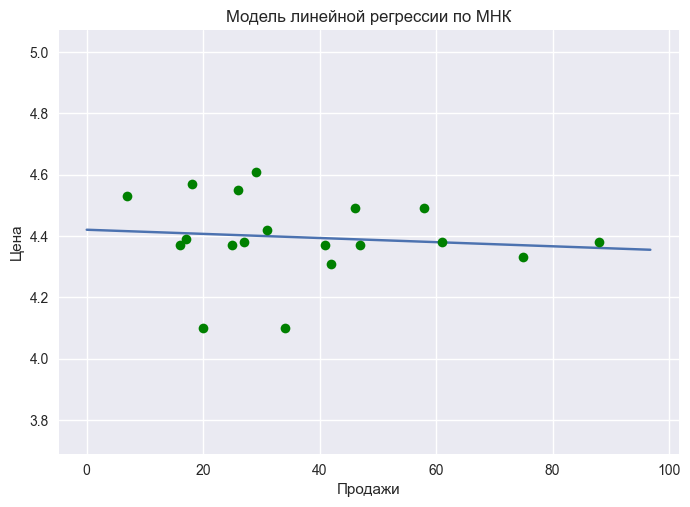

In [249]:
price_sales_func = []
sales_price_func = []

price_sales_dict = {}
sales_price_dict = {}

for i in range(n):
    price = prices[i]
    sale = sales[i]

    if price_sales_dict.get(price):
        price_sales_dict[price].append(sale)
    else:
        price_sales_dict[price] = [sale]
    if sales_price_dict.get(sale):
        sales_price_dict[sale].append(price)
    else:
        sales_price_dict[sale] = [price]

price_sales_func = sorted(
    [[k, sum(v) / len(v)] for k, v in price_sales_dict.items()])
sales_price_func = sorted(
    [[k, sum(v) / len(v)] for k, v in sales_price_dict.items()])
print('Функциональная зависимость:')
print('\n'.join(list(map(str, sales_price_func))))
A_price = np.array([[1, x[0]] for x in sales_price_func])
y_price = np.array([x[1] for x in sales_price_func])
c = np.dot(np.dot(np.linalg.inv(np.dot(A_price.transpose(), A_price)),
                  A_price.transpose()), y_price)
print(f'Функция: f(x)={c[0]}{"+" if c[1] > 0 else ""}{c[1]}x')
x = np.linspace(0, max(sales) * 1.1, 1000)
f_price = c[0] + c[1] * x
plt.plot(x, f_price)
plt.ylim(0.9 * min(prices), 1.1 * max(prices))
plt.grid(True)
for i in sales_price_func:
    plt.plot(i[0], i[1], 'go')

plt.xlabel('Продажи')
plt.ylabel('Цена')
plt.title('Модель линейной регрессии по МНК')
plt.show()

Функциональная зависимость:
[7, 1.5107219394949427]
[16, 1.4747630091074988]
[17, 1.47932922708708]
[18, 1.5195132049061133]
[20, 1.410986973710262]
[25, 1.4747630091074988]
[26, 1.5151272329628591]
[27, 1.4770487243883548]
[29, 1.5282278570085572]
[31, 1.4861396960896067]
[34, 1.410986973710262]
[41, 1.4747630091074988]
[42, 1.4609379041156563]
[46, 1.501852701754163]
[47, 1.4747630091074988]
[58, 1.501852701754163]
[61, 1.4770487243883548]
[75, 1.4655675420143985]
[88, 1.4770487243883548]
Функция: f(x)=4.416823437125511 * e**(-0.00014343537304055062*x)


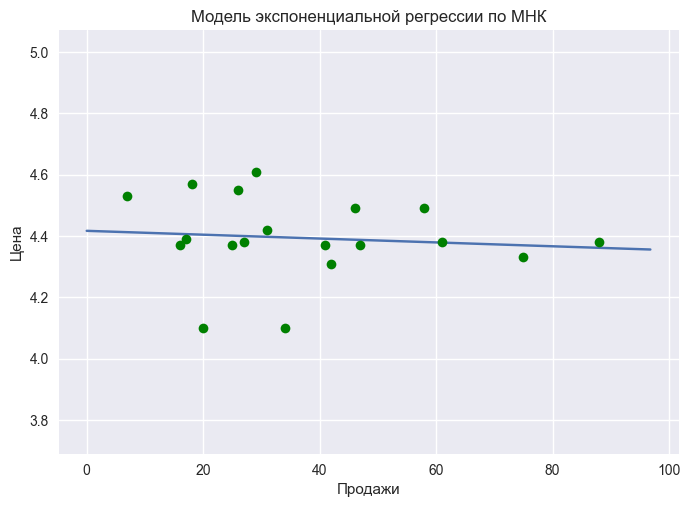

In [250]:
from math import log, e

y_price = np.array([log(x[1]) for x in sales_price_func])
print('Функциональная зависимость:')
print('\n'.join(list(map(lambda i: str([i[0], log(i[1])]), sales_price_func))))
c = np.dot(np.dot(np.linalg.inv(np.dot(A_price.transpose(), A_price)),
                  A_price.transpose()), y_price)
print(f'Функция: f(x)={e ** c[0]} * e**({c[1]}*x)')
x = np.linspace(0, 1.1 * max(sales), 1000)
f_price = e ** c[0] * e ** (c[1] * x)
plt.plot(x, f_price)
plt.ylim(0.9 * min(prices), 1.1 * max(prices))
plt.grid(True)
for i in sales_price_func:
    plt.plot(i[0], i[1], 'go')

plt.xlabel('Продажи')
plt.ylabel('Цена')
plt.title('Модель экспоненциальной регрессии по МНК')
plt.show()

# 5 Семинар

f(x)=271.22+1.96*x1-58.16*x2


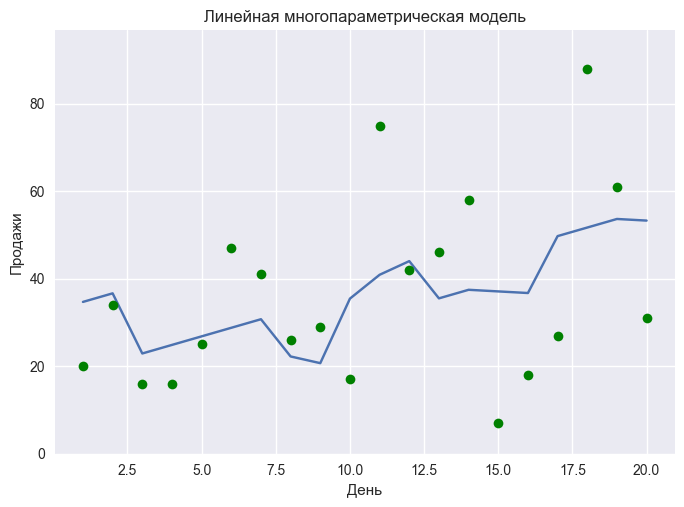

In [251]:
def cint(num):
    return "+" + str(round(num, 2)) if num > 0 else str(round(num, 2))


A_price = np.array([[1, dates[i], prices[i]] for i in range(n)])
y_price = np.array(sales)
c = np.dot(np.dot(np.linalg.inv(np.dot(A_price.transpose(), A_price)),
                  A_price.transpose()), y_price)

print(
    f'f(x)={round(c[0], 2)}{cint(c[1])}*x1{cint(c[2])}*x2')

x1 = np.array(dates)
x2 = np.array(prices)
y = c[0] + c[1] * x1 + c[2] * x2
plt.plot(x1, y)
plt.ylim(0, 1.1 * max(sales))
plt.grid(True)
for i in range(n):
    plt.plot(dates[i], sales[i], 'go')

plt.xlabel('День')
plt.ylabel('Продажи')
plt.title('Линейная многопараметрическая модель')
plt.show()

f(x)=1437.75-2.05*x1+25.89*log2(x1)+323.65*x2-1349.56*log2(x2)


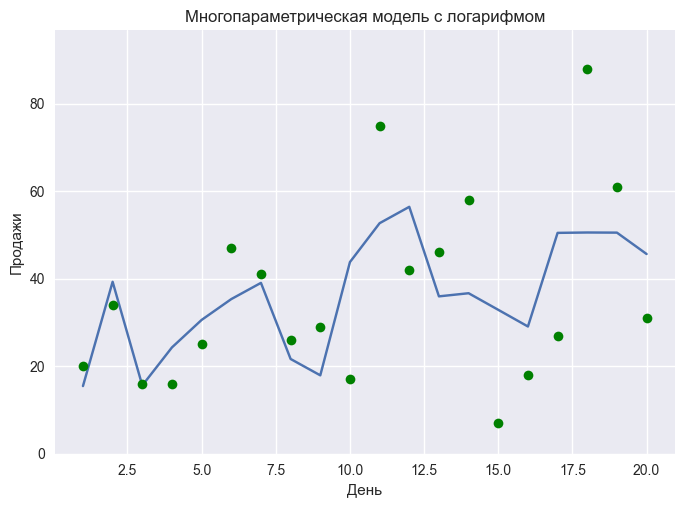

In [252]:
A_price = np.array(
    [[1, dates[i], log(dates[i], 2), prices[i], log(prices[i], 2)] for i in
     range(n)])
c = np.dot(np.dot(np.linalg.inv(np.dot(A_price.transpose(), A_price)),
                  A_price.transpose()), y_price)

print(
    f'f(x)={round(c[0], 2)}{cint(c[1])}*x1{cint(c[2])}*log2(x1){cint(c[3])}*x2{cint(c[4])}*log2(x2)')

x1 = np.array(dates)
x2 = np.array(prices)
log_y = c[0] + c[1] * x1 + c[2] * np.log2(x1) + c[3] * x2 + c[4] * np.log2(x2)
plt.plot(x1, log_y)
plt.ylim(0, 1.1 * max(sales))
plt.grid(True)
for i in range(n):
    plt.plot(dates[i], sales[i], 'go')

plt.xlabel('День')
plt.ylabel('Продажи')
plt.title('Многопараметрическая модель с логарифмом')
plt.show()

## Построение в 3х мерном виде

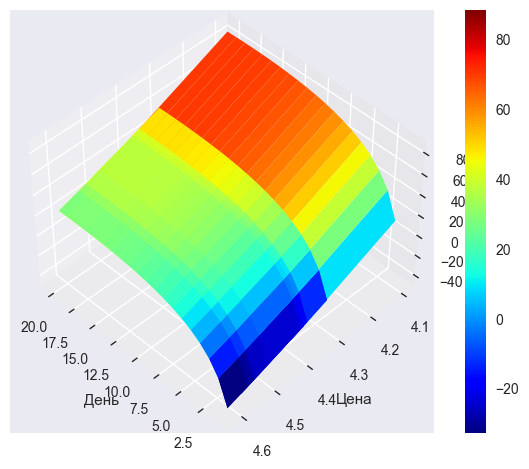

In [253]:
from matplotlib import cm

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x, y = np.meshgrid(x1, x2)
z = c[0] + c[1] * x + c[2] * np.log2(x) + c[3] * y + c[4] * np.log2(y)
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap=cm.jet, linewidth=0)
fig.colorbar(surf)
plt.xlabel('День')
plt.ylabel('Цена')
ax.view_init(45, 135)
plt.show()

# Семинар 6
### Построение динамической регрессионной модели

In [254]:
from itertools import accumulate

curr_df = pd.DataFrame()
curr_df['i'] = range(1, 21)
curr_df['ti'] = dates
curr_df['x'] = prices
curr_df['y'] = sales
curr_df['sum(x)'] = list(accumulate(prices))
curr_df['sum(y)'] = list(accumulate(sales))
curr_df['sum(sum(x))'] = list(accumulate(list(accumulate(prices))))
curr_df['sum(sum(y))'] = list(accumulate(list(accumulate(sales))))

curr_df


,i,ti,x,y,sum(x),sum(y),sum(sum(x)),sum(sum(y))
0,1,1,4.10,20,4.10,20,4.10,20
1,2,2,4.10,34,8.20,54,12.30,74
2,3,3,4.37,16,12.57,70,24.87,144
3,4,4,4.37,16,16.94,86,41.81,230
4,5,5,4.37,25,21.31,111,63.12,341
5,6,6,4.37,47,25.68,158,88.80,499
6,7,7,4.37,41,30.05,199,118.85,698
7,8,8,4.55,26,34.60,225,153.45,923
8,9,9,4.61,29,39.21,254,192.66,1177
9,10,10,4.39,17,43.60,271,236.26,1448


Построим динамические модели


Коэффициенты первого порядка:
[ 1.32030232 -0.08504442]
Коэффициенты второго порядка:
[-0.97858352  0.45813291  0.09086995]


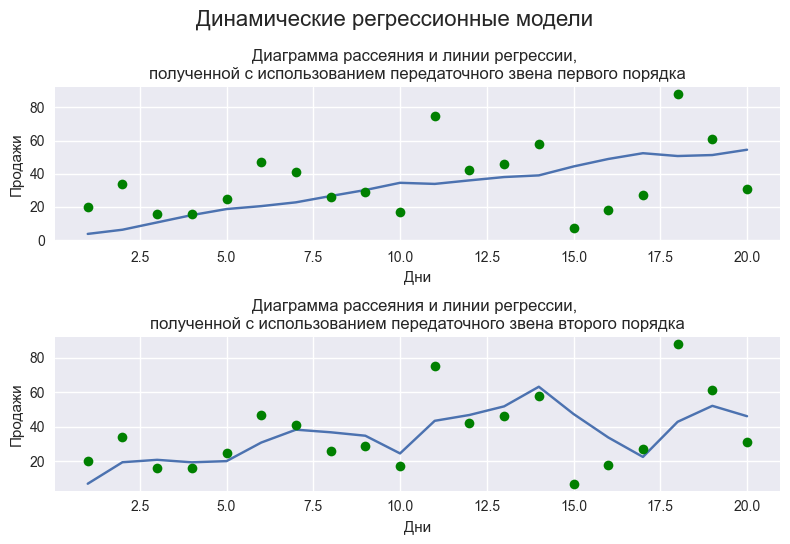

In [255]:
A_price = np.array(
    [[curr_df['sum(x)'][i], curr_df['sum(y)'][i]] for i in range(n)])
c_first = np.dot(np.dot(np.linalg.inv(np.dot(A_price.transpose(), A_price)),
                        A_price.transpose()), y_price)
print('Коэффициенты первого порядка:')
print(c_first)
A_price = np.array([[curr_df['sum(sum(x))'][i], curr_df['sum(y)'][i],
                     curr_df['sum(sum(y))'][i]] for i in range(n)])
c_second = np.dot(np.dot(np.linalg.inv(np.dot(A_price.transpose(), A_price)),
                         A_price.transpose()), y_price)

print('Коэффициенты второго порядка:')
print(c_second)
v1 = 0


def create_plot(cs, args, plot: plt.axes):
    func = 0
    for i in range(len(cs)):
        func += cs[i] * args[i]
    global v1
    v1 = func
    plot.plot(dates, func)
    for i in range(n):
        plot.plot(dates[i], sales[i], 'go')
    plot.grid(True)
    return plot


fig, axs = plt.subplots(2, 1)
axs[0] = create_plot(c_first, [curr_df['sum(x)'], curr_df['sum(y)']], axs[0])
axs[0].set_xlabel('Дни')
axs[0].set_ylabel('Продажи')
axs[0].set_title(
    'Диаграмма рассеяния и линии регрессии, \nполученной с использованием передаточного звена первого порядка')
axs[1] = create_plot(c_second, [curr_df['sum(sum(x))'], curr_df['sum(y)'],
                                curr_df['sum(sum(y))']], axs[1])
axs[1].set_xlabel('Дни')
axs[1].set_ylabel('Продажи')
axs[1].set_title(
    'Диаграмма рассеяния и линии регрессии, \nполученной с использованием передаточного звена второго порядка')

plt.suptitle("Динамические регрессионные модели", size=16)
fig.tight_layout()
plt.show()

# Семинар 7

In [256]:
help_table = pd.DataFrame()
help_table['День'] = dates
help_table['V1'] = v1
help_table['V2'] = log_y
help_table['Продажи'] = sales
help_table

,День,V1,V2,Продажи
0,1,6.967865,15.461997,20
1,2,19.426976,39.299688,34
2,3,20.817204,15.605778,16
3,4,19.384941,24.300344,16
4,5,20.071213,30.584555,25
5,6,30.830887,35.344164,47
6,7,38.291021,39.051660,41
7,8,36.789225,21.656313,26
8,9,34.785786,17.917447,29
9,10,24.533560,43.806140,17


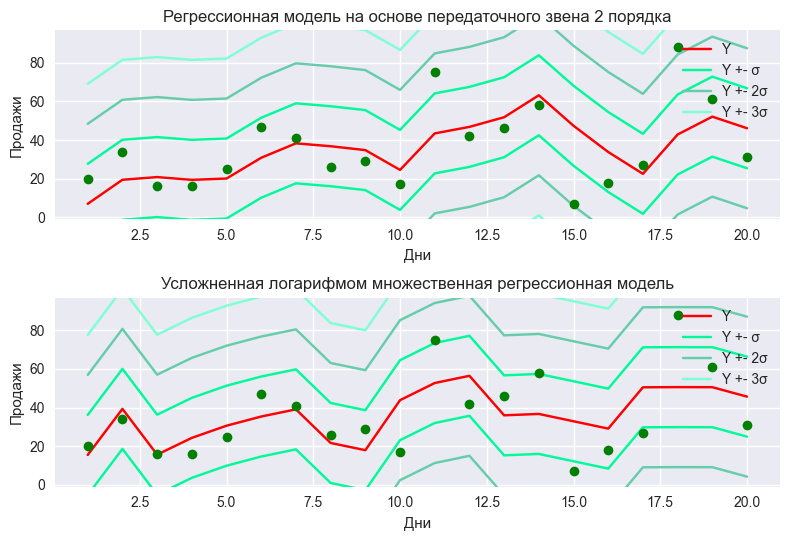

In [257]:


def build_2_3_std(plotik, data, std):
    plotik.plot(dates, data, label='Y', color='red')
    plotik.plot(dates, data + std, color='mediumspringgreen', label='Y +- σ')
    plotik.plot(dates, data - std, color='mediumspringgreen')

    plotik.plot(dates, data + 2 * std, color='mediumaquamarine',
                label='Y +- 2σ')
    plotik.plot(dates, data - 2 * std, color='mediumaquamarine')

    plotik.plot(dates, data + 3 * std, color='aquamarine', label='Y +- 3σ')
    plotik.plot(dates, data - 3 * std, color='aquamarine')
    for i in range(n):
        plotik.plot(dates[i], sales[i], 'go')
    plotik.set_ylim(-1, max(sales) * 1.1)
    plotik.legend(loc='upper right')


fig, axs = plt.subplots(2, 1)
build_2_3_std(axs[0], v1, SD_sale)
axs[0].set_xlabel('Дни')
axs[0].set_ylabel('Продажи')
axs[0].set_title('Регрессионная модель на основе передаточного звена 2 порядка')
build_2_3_std(axs[1], log_y, SD_sale)
axs[1].set_xlabel('Дни')
axs[1].set_ylabel('Продажи')
axs[1].set_title('Усложненная логарифмом множественная регрессионная модель')
fig.tight_layout()
plt.show()

Считаем количество попаданий точек в интервалы

In [258]:
std_intervals = pd.DataFrame()
std = SD_sale
std_intervals[''] = ['1 вар', '2 вар']


def build_ints():
    for i in range(1, 4):
        a = i if i != 1 else ''
        std_intervals[f'+-{a}σ'] = [len(help_table[(help_table['Продажи'] >
                                                    help_table[
                                                        'V1'] - i * std) & (
                                                           help_table[
                                                               'Продажи'] <
                                                           help_table[
                                                               'V1'] + i * std)]),
                                    len(help_table[(help_table['Продажи'] >
                                                    help_table[
                                                        'V2'] - i * std) & (
                                                           help_table[
                                                               'Продажи'] <
                                                           help_table[
                                                               'V2'] + i * std)])]
        std_intervals[f'+-{a}σ%'] = [len(help_table[(help_table['Продажи'] >
                                                     help_table[
                                                         'V1'] - i * std) & (
                                                            help_table[
                                                                'Продажи'] <
                                                            help_table[
                                                                'V1'] + i * std)]) * 100 // n,
                                     len(help_table[(help_table['Продажи'] >
                                                     help_table[
                                                         'V2'] - i * std) & (
                                                            help_table[
                                                                'Продажи'] <
                                                            help_table[
                                                                'V2'] + i * std)]) * 100 // n]


build_ints()

'''
Для того, чтобы гипотеза принималась необходимо, чтобы в первый интервал попадало не менее 68%, а во второй интервал не менее 95% экспериментальных точек. В некоторых случаях проверку дополняют проверкой количества точек в интервале 3σ в который должно попадать не менее 99.7% экспериментальных точек
'''
std_intervals

,,+-σ,+-σ%,+-2σ,+-2σ%,+-3σ,+-3σ%
0,1 вар,17,85,19,95,20,100
1,2 вар,14,70,20,100,20,100


In [259]:
stat = pd.DataFrame()


def mae(act, pred):  #
    diff = pred - act
    abs_diff = np.absolute(diff)
    mean_diff = abs_diff.mean()
    return mean_diff


def rmse(act, pred):
    diff = pred - act
    differences_squared = diff ** 2
    mean_diff = differences_squared.mean()
    rmse_val = np.sqrt(mean_diff)
    return rmse_val


def mape(act, pred):
    act, pred = np.array(act), np.array(pred)
    return np.mean(np.abs((act - pred) / act)) * 100


def mase(act, pred):
    naive_forecast = np.roll(act, 1)
    error = np.abs(act - pred)
    scaled_error = error / np.mean(np.abs(act - naive_forecast))
    return np.mean(scaled_error)


stat[''] = ['1 вар', '2 вар']
stat['MAE'] = [mae(help_table['Продажи'], v1),
               mae(help_table['Продажи'], log_y)]
stat['RMSE'] = [rmse(help_table['Продажи'], v1),
                rmse(help_table['Продажи'], log_y)]

stat['MAPE'] = [mape(help_table['Продажи'], v1),
                mape(help_table['Продажи'], log_y)]

stat['MASE'] = [mase(help_table['Продажи'], v1),
                mase(help_table['Продажи'], log_y)]

stat

,,MAE,RMSE,MAPE,MASE
0,1 вар,13.045006,17.666911,59.840724,0.642611
1,2 вар,13.551907,16.552263,55.254830,0.667582


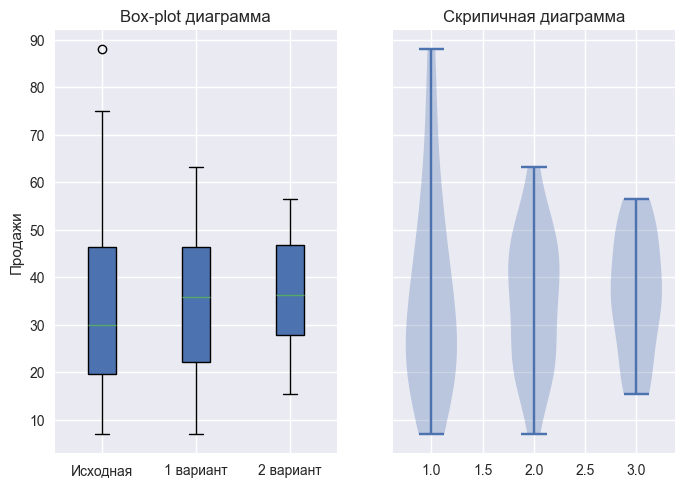

In [260]:
labels = ['Исходная', '1 вариант', '2 вариант']
fig, ax = plt.subplots(1, 2, sharey=True)
ax[0].boxplot([sales, v1, log_y], patch_artist=True, vert=True, labels=labels)
ax[0].set_ylabel('Продажи')
ax[0].set_title('Box-plot диаграмма')

ax[1].violinplot([sales, v1, log_y], vert=True)
ax[1].set_title('Скрипичная диаграмма')
plt.show()

# 8 Семинар

### Разбиваем набор данных на обучающую и тестовую выборки

f(x)=2639.61-2.7*x1+27.52*log2(x1)+956.04*x2-3213.68*log2(x2)


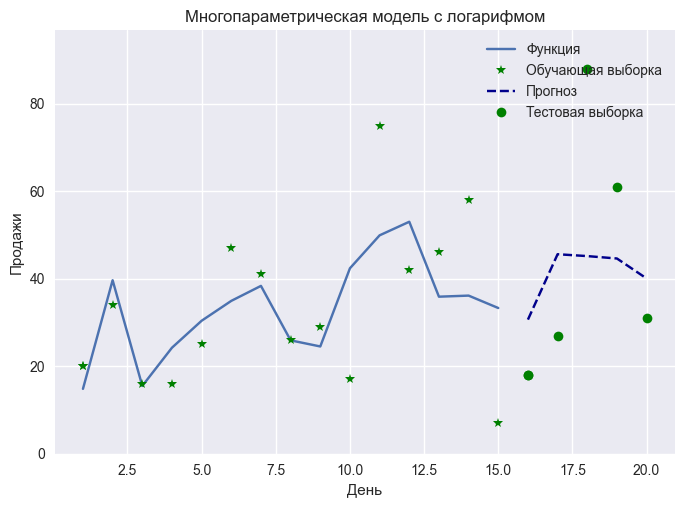

In [261]:
def show_train_test(train_res, train_real, test_pred, test_real, x_train,
                    x_test):
    plt.plot(x_train, train_res, marker='_', label='Функция')
    plt.ylim(0, 1.1 * max(max(train_real), max(test_real)))
    plt.grid(True)
    plt.plot(x_train[0], train_real[0], 'g*', label='Обучающая выборка')
    for i in range(len(x_train)):
        plt.plot(x_train[i], train_real[i], color='green', marker='*')

    plt.plot(x_test, test_pred, label='Прогноз', linestyle='--',
             color='darkblue')
    plt.plot(x_test[0], test_real[0], 'go', label='Тестовая выборка')
    for i in range(len(x_test)):
        plt.plot(x_test[i], test_real[i], color='green', marker='o')


A_price = np.array(
    [[1, dates[i], log(dates[i], 2), prices[i], log(prices[i], 2)] for i in
     range(15)])

train, test = sales[:15], sales[15:]
c = np.dot(np.dot(np.linalg.inv(np.dot(A_price.transpose(), A_price)),
                  A_price.transpose()), train)

print(
    f'f(x)={round(c[0], 2)}{cint(c[1])}*x1{cint(c[2])}*log2(x1){cint(c[3])}*x2{cint(c[4])}*log2(x2)')

x_train = np.array(dates[:15])
x2 = np.array(prices[:15])
log_y = c[0] + c[1] * x_train + c[2] * np.log2(x_train) + c[3] * x2 + c[
    4] * np.log2(x2)

x1 = np.array(dates[15:])
x2 = np.array(prices[15:])
y_pred = c[0] + c[1] * x1 + c[2] * np.log2(x1) + c[3] * x2 + c[4] * np.log2(x2)

show_train_test(log_y, sales[:15], y_pred, sales[15:], dates[:15], dates[15:])

plt.xlabel('День')
plt.ylabel('Продажи')
plt.title('Многопараметрическая модель с логарифмом')
plt.legend(loc='upper right')
plt.show()


Проверяем критерий Стьюдента

In [262]:

print(f'F={(np.var(test)) / (np.var(y_pred))}')
print(f'k={5 - 1}')
print('Доверительная вероятность: 0.999')

k = len(y_pred) + len(test) - 2
print(f'k = {k}')
S2 = abs((np.var(test)) - (np.var(y_pred))) / k
print(f'Среднеквадратичная погрешность = {S2}')
n1, n2 = len(test), len(y_pred)
t = abs(np.mean(test) - np.mean(y_pred)) / np.sqrt(S2 * ((n1 * n2) / (n1 + n2)))

print(f't = {t}')
print('t(P, k) = 1.397')
print('Доверительная вероятность: 0.904')
'''
Таким образом, значения не однородны
'''


F=21.044906228503788
k=4
Доверительная вероятность: 0.999
k = 8
Среднеквадратичная погрешность = 79.86566293099318
t = 0.2674690881742084
t(P, k) = 1.397
Доверительная вероятность: 0.904


'\nТаким образом, значения не однородны\n'

Построить мультипликативную модель разложения временного ряда. Для чего выделить составляющую, полученную на первом шаге выполнения работы, а для оставшейся составляющей выбрать вид функции на основе графика построенных значений и найти коэффициенты с помощью МНК. Проверить качество мультипликативной модели по критериям Фишера и Стьюдента, сравнить полученные результаты с полученными на первом шаге выполнения задания.

In [263]:
multi_model = pd.DataFrame()
multi_model[''] = ['train'] * 15 + ['test'] * 5
multi_model['День'] = dates
multi_model['Цена'] = prices
multi_model['Продажи'] = sales

multi_model['Модельное число продаж'] = np.array(
    pd.concat([pd.Series(log_y), pd.Series(y_pred)]))
multi_model['Остаточное значение'] = multi_model['Продажи'] - multi_model[
    'Модельное число продаж']
multi_model['Остаточное дробью'] = multi_model['Продажи'] / multi_model[
    'Модельное число продаж']

multi_model

,,День,Цена,Продажи,Модельное число продаж,Остаточное значение,Остаточное дробью
0,train,1,4.10,20,14.828334,5.171666,1.348769
1,train,2,4.10,34,39.655855,-5.655855,0.857377
2,train,3,4.37,16,15.501515,0.498485,1.032157
3,train,4,4.37,16,24.228820,-8.228820,0.660371
4,train,5,4.37,25,30.393428,-5.393428,0.822546
5,train,6,4.37,47,34.937076,12.062924,1.345276
6,train,7,4.37,41,38.362114,2.637886,1.068763
7,train,8,4.55,26,25.912042,0.087958,1.003394
8,train,9,4.61,29,24.516020,4.483980,1.182900
9,train,10,4.39,17,42.387146,-25.387146,0.401065


[1.06548547 0.27046714 0.16501775]


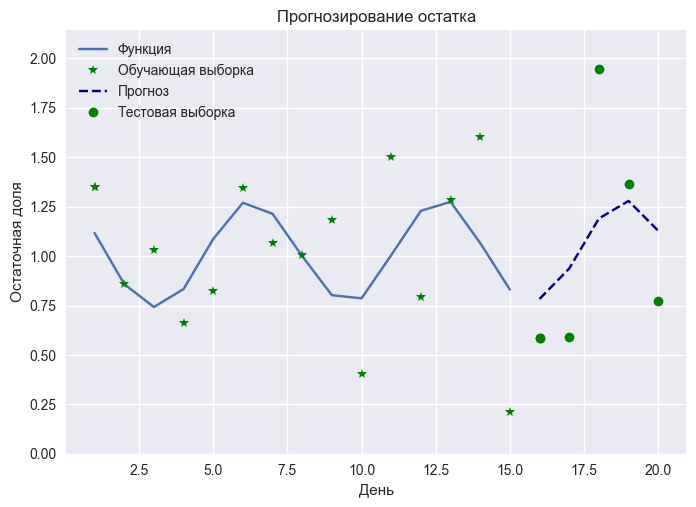

In [264]:
from numpy import cos

A_price = np.array(
    [[1, cos(dates[i]), cos(prices[i])] for i in
     range(15)])

c = np.dot(np.dot(np.linalg.inv(np.dot(A_price.transpose(), A_price)),
                  A_price.transpose()), multi_model['Остаточное дробью'][:15])
print(c)

y2_train = c[0] + c[1] * cos(dates[:15]) + c[2] * cos(prices[:15])
y2_test = c[0] + c[1] * cos(dates[15:]) + c[2] * cos(prices[15:])
show_train_test(y2_train, multi_model['Остаточное дробью'][:15], y2_test,
                list(multi_model['Остаточное дробью'][15:]), dates[:15],
                dates[15:])
plt.xlabel('День')
plt.ylabel('Остаточная доля')
plt.title('Прогнозирование остатка')
plt.legend(loc='upper right')
plt.legend()
plt.show()

Теперь можно восстановить значения у2 и построить модель прогнозирования на основе мультипликативной регрессионной модели

In [265]:
final_train = log_y * y2_train
final_test = y_pred * y2_test
multi_model['Восстановленное значение'] = np.array(
    pd.concat([pd.Series(final_train), pd.Series(final_test)]))

multi_model

,,День,Цена,Продажи,Модельное число продаж,Остаточное значение,Остаточное дробью,Восстановленное значение
0,train,1,4.10,20,14.828334,5.171666,1.348769,16.559740
1,train,2,4.10,34,39.655855,-5.655855,0.857377,34.027708
2,train,3,4.37,16,15.501515,0.498485,1.032157,11.507120
3,train,4,4.37,16,24.228820,-8.228820,0.660371,20.189720
4,train,5,4.37,25,30.393428,-5.393428,0.822546,33.031699
5,train,6,4.37,47,34.937076,12.062924,1.345276,44.362302
6,train,7,4.37,41,38.362114,2.637886,1.068763,46.571164
7,train,8,4.55,26,25.912042,0.087958,1.003394,25.897869
8,train,9,4.61,29,24.516020,4.483980,1.182900,19.666462
9,train,10,4.39,17,42.387146,-25.387146,0.401065,33.327362


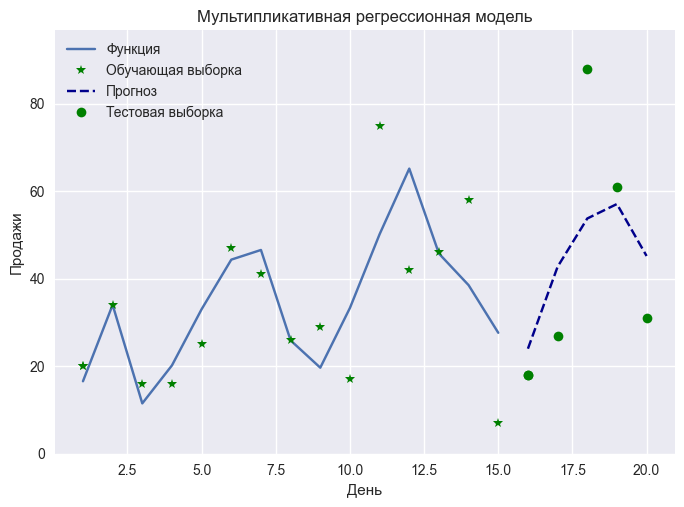

In [266]:

show_train_test(final_train, sales[:15], final_test, list(sales[15:]),
                dates[:15], dates[15:])
plt.xlabel('День')
plt.ylabel('Продажи')
plt.title('Мультипликативная регрессионная модель')
plt.legend(loc='upper right')
plt.legend()
plt.show()

Проверим качество мультипликативной модели по критериям Фишера и Стьюдента

In [267]:

print(f'F={(np.var(test)) / (np.var(final_test))}')
print(f'k={5 - 1}')
print('Доверительная вероятность: 0.999')

k = len(final_test) + len(test) - 2
print(f'k = {k}')
S2 = abs((np.std(test) ** 2) - (np.std(final_test) ** 2)) / k
print(f'Среднеквадратичная погрешность = {S2}')
n1, n2 = len(test), len(final_test)
t = (np.mean(test) - np.mean(final_test)) / np.sqrt(
    S2 * ((n1 * n2) / (n1 + n2)))

print(f't = {t}')
print('t(P, k) = 1,397')
print('Доверительная вероятность 0.904')


F=5.023421150575305
k=4
Доверительная вероятность: 0.999
k = 8
Среднеквадратичная погрешность = 67.15818828710049
t = 0.034354306019784286
t(P, k) = 1,397
Доверительная вероятность 0.904


# Семинар 9

Разметим данные. Если цена уменьшилась или не изменилась и при этом объем продаж увеличился или не изменился, то присваиваем класс 0 иначе класс 1

,День,Цена,Продажи,Класс
0,1,4.10,20,NaN
1,2,4.10,34,1.0
2,3,4.37,16,0.0
3,4,4.37,16,1.0
4,5,4.37,25,1.0
5,6,4.37,47,1.0
6,7,4.37,41,0.0
7,8,4.55,26,0.0
8,9,4.61,29,0.0
9,10,4.39,17,0.0


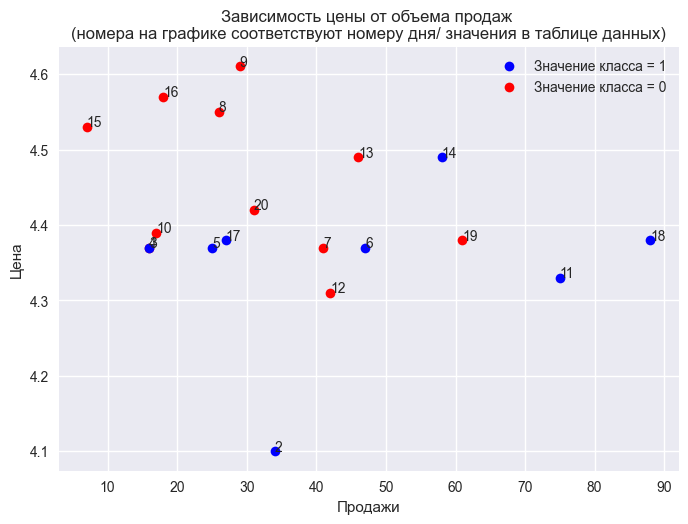

In [268]:

classes = [None]
for i in range(1, n):
    if prices[i] <= prices[i - 1] and sales[i] >= sales[i - 1]:
        classes.append(1)
    else:
        classes.append(0)
class_df = pd.DataFrame()
class_df['День'] = dates
class_df['Цена'] = prices
class_df['Продажи'] = sales
class_df['Класс'] = classes
f0 = ''
f1 = ''
for i in range(1, n):
    if classes[i] == 0:
        if not f0:
            f0 = plt.plot(sales[i], prices[i], 'ro',
                          label='Значение класса = 0')
        else:
            plt.plot(sales[i], prices[i], marker='o', color='red')
    else:
        if not f1:
            f1 = plt.plot(sales[i], prices[i], 'bo',
                          label='Значение класса = 1')
        else:
            plt.plot(sales[i], prices[i], marker='o', color='blue')
    plt.annotate(str(dates[i]), (sales[i], prices[i]))

plt.legend()
plt.xlabel('Продажи')
plt.ylabel('Цена')
plt.title(
    'Зависимость цены от объема продаж \n(номера на графике соответствуют номеру дня/ значения в таблице данных)')
class_df

Преположим, что каждое 3-к значение класса нам не известно

Text(0.5, 1.0, 'Зависимость цены от объема продаж \n(номера на графике соответствуют номеру дня/ значения в таблице данных)')

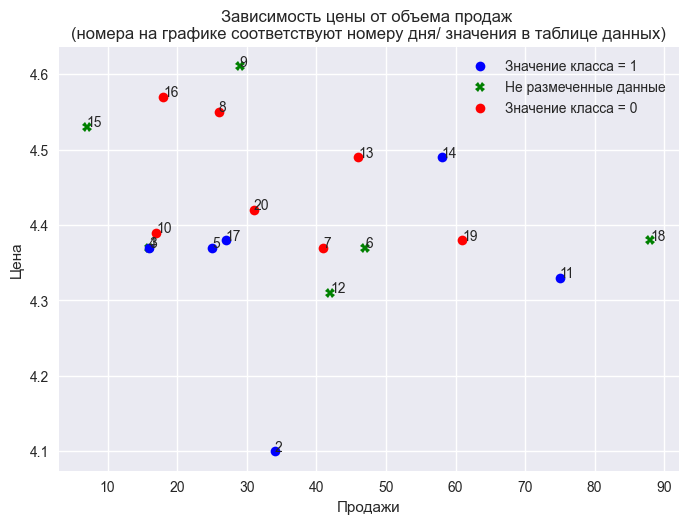

In [269]:
classes_train = [None]
for i in range(1, n):
    if (i + 1) % 3 == 0:
        classes_train.append(None)
    elif prices[i] <= prices[i - 1] and sales[i] >= sales[i - 1]:
        classes_train.append(1)
    else:
        classes_train.append(0)

class_df = pd.DataFrame()
class_df['День'] = dates
class_df['Цена'] = prices
class_df['Продажи'] = sales
class_df['Класс'] = classes_train
fn = ''
f0 = ''
f1 = ''
for i in range(1, n):
    if classes_train[i] == None:
        if not fn:
            fn = plt.plot(sales[i], prices[i], 'gX',
                          label='Не размеченные данные')
        else:
            plt.plot(sales[i], prices[i], 'gX')
    elif classes_train[i] == 0:
        if not f0:
            f0 = plt.plot(sales[i], prices[i], 'ro',
                          label='Значение класса = 0')
        else:
            plt.plot(sales[i], prices[i], marker='o', color='red')
    else:
        if not f1:
            f1 = plt.plot(sales[i], prices[i], 'bo',
                          label='Значение класса = 1')
        else:
            plt.plot(sales[i], prices[i], marker='o', color='blue')
    plt.annotate(str(dates[i]), (sales[i], prices[i]))

plt.legend()
plt.xlabel('Продажи')
plt.ylabel('Цена')
plt.title(
    'Зависимость цены от объема продаж \n(номера на графике соответствуют номеру дня/ значения в таблице данных)')

In [270]:
knn = pd.DataFrame()
knn['1_'] = ['', 'Класс'] + [i for i in classes_train if i != None] + ['', '']
knn['2_'] = ['', 'День'] + [dates[i] for i in range(n) if
                            classes_train[i] != None] + ['', '']
knn['3_'] = ['', 'Цена'] + [prices[i] for i in range(n) if
                            classes_train[i] != None] + ['', '']
knn['День'] = ['Цена', 'Продажи'] + [sales[i] for i in range(n) if
                                     classes_train[i] != None] + [
                  'Класс при k=1', 'Класс при k=3']


def count_distance(day1, day2):
    return round(sqrt((prices[day1 - 1] - prices[day2 - 1]) ** 2 + (
            sales[day1 - 1] - sales[day2 - 1]) ** 2), 1)


for i in [3, 6, 9, 12, 15, 18]:
    distances = []
    for day in knn['2_'][2:-2]:
        distances.append(count_distance(i, day))

    nearest = pd.Series(distances).nsmallest(3).index

    k0 = 0
    for j in nearest:
        if knn['1_'][2:-2].values[j] == 0:
            k0 += 1
    k1 = knn['1_'][2:-2].values[nearest[0]]
    k3 = int(k0 <= 1)
    knn[str(i)] = [prices[i - 1], sales[i - 1]] + distances + [k1, k3]

knn

,1_,2_,3_,День,3,6,9,12,15,18
0,,,,Цена,4.37,4.37,4.61,4.31,4.53,4.38
1,Класс,День,Цена,Продажи,16.00,47.00,29.00,42.00,7.00,88.00
2,1,2,4.1,34,18.00,13.00,5.00,8.00,27.00,54.00
3,1,4,4.37,16,0.00,31.00,13.00,26.00,9.00,72.00
4,1,5,4.37,25,9.00,22.00,4.00,17.00,18.00,63.00
5,0,7,4.37,41,25.00,6.00,12.00,1.00,34.00,47.00
6,0,8,4.55,26,10.00,21.00,3.00,16.00,19.00,62.00
7,0,10,4.39,17,1.00,30.00,12.00,25.00,10.00,71.00
8,1,11,4.33,75,59.00,28.00,46.00,33.00,68.00,13.00
9,0,13,4.49,46,30.00,1.00,17.00,4.00,39.00,42.00


Сравним показатели

In [271]:
compare_df = pd.DataFrame()
compare_df['День'] = [3, 6, 9, 12, 15, 18]
compare_df['Класс'] = [classes[i - 1] for i in [3, 6, 9, 12, 15, 18]]
compare_df['k=1'] = knn.iloc[-2:].values[0][4:]
compare_df['k=3'] = knn.iloc[-1:].values[0][4:]
compare_df

,День,Класс,k=1,k=3
0,3,0,1.0,0.0
1,6,1,0.0,0.0
2,9,0,1.0,0.0
3,12,0,0.0,0.0
4,15,0,1.0,0.0
5,18,1,1.0,1.0


In [272]:
k1_hits = len(compare_df[compare_df['k=1'] == compare_df['Класс']])
k3_hits = len(compare_df[compare_df['k=3'] == compare_df['Класс']])

print(f'Попаданий при k=1: {k1_hits}')
print(f'Попаданий при k=3: {k3_hits}')

Попаданий при k=1: 2
Попаданий при k=3: 5


# Семинар 10

### Возьмите размеченные данные по классам, полученные на предыдущем семинаре. Из значений не кратных 3-м сформируйте обучающую выборку, а из значений кратным 3-м тестовую.

In [273]:
class_df['Класс'] = classes
class_df = class_df.iloc[1:, :]
class_df['Выборка'] = ['Тестовая' if i % 3 == 0 else 'Обучающая' for i in
                       dates[1:]]
class_df

,День,Цена,Продажи,Класс,Выборка
1,2,4.10,34,1.0,Обучающая
2,3,4.37,16,0.0,Тестовая
3,4,4.37,16,1.0,Обучающая
4,5,4.37,25,1.0,Обучающая
5,6,4.37,47,1.0,Тестовая
6,7,4.37,41,0.0,Обучающая
7,8,4.55,26,0.0,Обучающая
8,9,4.61,29,0.0,Тестовая
9,10,4.39,17,0.0,Обучающая
10,11,4.33,75,1.0,Обучающая


Для определения места разбиения воспользуемся формулой для двух классов p1(1 − p1) + p2(1 − p2), где p1 и p2 вероятность принадлежности к одному или другому классу.

In [274]:


def create_table(title: str, data: pd.Series, d_classes: pd.Series):
    df = pd.DataFrame({title: data,
                       'Класс': d_classes})

    # Инициализируем новые столбцы для p1, p2 и Формула
    df['p1'] = np.nan
    df['p2'] = np.nan
    df['Вероятность'] = np.nan

    # Вычисляем p1, p2 и Формула для каждой строки
    for i in df.index[:-1]:
        p1 = df.loc[:i, 'Класс'].mean()
        #print(df.loc[i:, 'Класс'].value_counts().to_dict())
        try:
            left_part = df.loc[i:].iloc[1:]
            left_zeros = len(left_part[left_part['Класс'] == 0])
            p2 = left_zeros / (len(left_part))
        except ZeroDivisionError:
            print(i)
            p2 = 0
        df.loc[i, 'p1'] = p1
        df.loc[i, 'p2'] = p2
        df.loc[i, 'Вероятность'] = p1 * (1 - p1) + p2 * (1 - p2)

    for item in df[title].unique():
        last_index = df[df[title] == item].index[-1]
        df.loc[df[title] == item, ['p1', 'p2', 'Вероятность']] = df.loc[
            last_index, ['p1', 'p2', 'Вероятность']].values
    return df


In [275]:
# Заданные данные
prices_start = class_df['Цена'][class_df['Выборка'] == 'Обучающая']
prices_start = prices_start.sort_values()

sales_start = class_df['Продажи'][class_df['Выборка'] == 'Обучающая']
sales_start = sales_start.sort_values()

classes_start = class_df['Класс'][class_df['Выборка'] == 'Обучающая'].reindex(
    prices_start.index)
classes_start_sales = class_df['Класс'][
    class_df['Выборка'] == 'Обучающая'].reindex(sales_start.index)

price_table_start = create_table('Цена', prices_start, classes_start)
sales_table_start = create_table('Продажи', sales_start, classes_start_sales)
price_table_start


,Цена,Класс,p1,p2,Вероятность
1,4.10,1.0,1.000000,0.583333,0.243056
10,4.33,1.0,1.000000,0.636364,0.231405
3,4.37,1.0,0.800000,0.750000,0.347500
4,4.37,1.0,0.800000,0.750000,0.347500
6,4.37,0.0,0.800000,0.750000,0.347500
16,4.38,1.0,0.714286,0.833333,0.342971
18,4.38,0.0,0.714286,0.833333,0.342971
9,4.39,0.0,0.625000,0.800000,0.394375
19,4.42,0.0,0.555556,0.750000,0.434414
12,4.49,0.0,0.545455,1.000000,0.247934


In [276]:
sales_table_start

,Продажи,Класс,p1,p2,Вероятность
3,16,1.0,1.000000,0.583333,0.243056
9,17,0.0,0.500000,0.545455,0.497934
15,18,0.0,0.333333,0.500000,0.472222
4,25,1.0,0.500000,0.555556,0.496914
7,26,0.0,0.400000,0.500000,0.490000
16,27,1.0,0.500000,0.571429,0.494898
19,31,0.0,0.428571,0.500000,0.494898
1,34,1.0,0.500000,0.600000,0.490000
6,41,0.0,0.444444,0.500000,0.496914
12,46,0.0,0.400000,0.333333,0.462222


In [277]:
history = pd.DataFrame({'Таблица': [], 'Значение': [], 'Кол-во в отсеченной части': [], 'Основное справа': [], 'Среди оставшихся 0': [], 'Среди отсеченных 1': []})


def remove_min(table, title):
    altrenative = False
    removed_title = title
    absolute_min = table['Вероятность'].min()
    remove_index = \
    list(table[table['Вероятность'] == absolute_min].index)[0]
    split_value = \
    list(table[title][table['Вероятность'] == absolute_min])[0]
    propability = (len(table[table[title] <= split_value])) / len(table)
    deleted_indexes = table[table[title] <= split_value].index
    
    zero_in_remained = len(table[(table[title] > split_value) & (table['Класс'] == 0)]) / len(table[table[title] > split_value])
    ones_in_thrown = len(table[(table[title] <= split_value) & (table['Класс'] == 1)]) / len(table[table[title] <= split_value])
    if len(deleted_indexes) > len(table) / 2:
        altrenative = True
        deleted_indexes = table[table[title] > split_value].index
        propability = 1 - propability
        zero_in_remained = len(table[(table[title] <= split_value) & (table['Класс'] == 0)]) / len(table[table[title] <= split_value])
        ones_in_thrown = len(table[(table[title] > split_value) & (table['Класс'] == 1)]) / len(table[table[title] > split_value])
    return removed_title, split_value, propability, altrenative, zero_in_remained, ones_in_thrown, deleted_indexes

def remove_min_prob(table1: pd.DataFrame, table2: pd.DataFrame):
    
    if table1['Вероятность'].min() <= table2['Вероятность'].min():
        removed_title, split_value, propability, altrenative, zero_in_remained, ones_in_thrown, deleted_indexes = remove_min(table1, 'Цена')
    else:
        removed_title, split_value, propability, altrenative, zero_in_remained, ones_in_thrown, deleted_indexes = remove_min(table2, 'Продажи')
        

    table1 = table1.drop(index=deleted_indexes)
    table2 = table2.drop(index=deleted_indexes)
    history.loc[len(history.index)] = [removed_title, split_value, propability, altrenative, zero_in_remained, ones_in_thrown]
    return table1, table2

def remove_min_prob1(table1: pd.DataFrame, table2: pd.DataFrame):
    altrenative = False
    if table1['Вероятность'].min() <= table2['Вероятность'].min():
        removed_title = 'Цена'
        absolute_min = table1['Вероятность'].min()
        remove_index = \
        list(table1[table1['Вероятность'] == absolute_min].index)[0]
        split_value = \
        list(table1['Цена'][table1['Вероятность'] == absolute_min])[0]
        propability = (len(table1) - len(
            table1.loc[remove_index:, 'Класс']) + 1) / len(table1)
        deleted_indexes = table1[table1['Цена'] <= split_value].index
        
        zero_in_remained = len(table1[(table1['Цена'] <= split_value) & (table1['Класс'] == 0)]) / len(table1[table1['Цена'] <= split_value])
        ones_in_thrown = len(table1[(table1['Цена'] > split_value) & (table1['Класс'] == 1)]) / len(table1[table1['Цена'] > split_value])
        if len(deleted_indexes) > len(table1) / 2:
            altrenative = True
            deleted_indexes = table1[table1['Цена'] > split_value].index
            propability = 1 - propability
            zero_in_remained = 1 - zero_in_remained
            ones_in_thrown = 1 - ones_in_thrown
    else:
        absolute_min = table2['Вероятность'].min()
        removed_title = 'Продажи'
        remove_index = \
        list(table2[table2['Вероятность'] == absolute_min].index)[0]
        split_value = \
        list(table2['Продажи'][table2['Вероятность'] == absolute_min].values)[0]

        deleted_indexes = table2[table2['Продажи'] <= split_value].index
        propability = (len(table2) - len(
            table2.loc[remove_index:, 'Класс']) + 1) / len(table2)
        zero_in_remained = len(table2[(table2['Продажи'] <= split_value) & (table2['Класс'] == 0)]) / len(table2[table2['Продажи'] <= split_value])
        ones_in_thrown = len(table2[(table2['Продажи'] > split_value) & (table2['Класс'] == 1)]) / len(table2[table2['Продажи'] > split_value])
        if len(deleted_indexes) > len(table2) / 2:
            altrenative = True
            deleted_indexes = table2[table2['Продажи'] > split_value].index
            propability = 1 - propability
            zero_in_remained = 1 - zero_in_remained
            ones_in_thrown = 1 - ones_in_thrown
        

    table1 = table1.drop(index=deleted_indexes)
    table2 = table2.drop(index=deleted_indexes)
    history.loc[len(history.index)] = [removed_title, split_value, propability, altrenative, zero_in_remained, ones_in_thrown]
    return table1, table2




In [278]:

while len(price_table_start) > 1:
    print(price_table_start)
    print(sales_table_start)
    price_table_start, sales_table_start = remove_min_prob(price_table_start,
                                                           sales_table_start)
    
    print()
    prices_start = price_table_start['Цена']
    
    sales_start = sales_table_start['Продажи']
    
    classes_start = price_table_start['Класс']
    classes_start_sales = sales_table_start['Класс']
    
    price_table_start = create_table('Цена', prices_start, classes_start)
    sales_table_start = create_table('Продажи', sales_start, classes_start_sales)


    Цена  Класс        p1        p2  Вероятность
1   4.10    1.0  1.000000  0.583333     0.243056
10  4.33    1.0  1.000000  0.636364     0.231405
3   4.37    1.0  0.800000  0.750000     0.347500
4   4.37    1.0  0.800000  0.750000     0.347500
6   4.37    0.0  0.800000  0.750000     0.347500
16  4.38    1.0  0.714286  0.833333     0.342971
18  4.38    0.0  0.714286  0.833333     0.342971
9   4.39    0.0  0.625000  0.800000     0.394375
19  4.42    0.0  0.555556  0.750000     0.434414
12  4.49    0.0  0.545455  1.000000     0.247934
13  4.49    1.0  0.545455  1.000000     0.247934
7   4.55    0.0  0.500000  1.000000     0.250000
15  4.57    0.0       NaN       NaN          NaN
    Продажи  Класс        p1        p2  Вероятность
3        16    1.0  1.000000  0.583333     0.243056
9        17    0.0  0.500000  0.545455     0.497934
15       18    0.0  0.333333  0.500000     0.472222
4        25    1.0  0.500000  0.555556     0.496914
7        26    0.0  0.400000  0.500000     0.490000
16

In [279]:
history

,Таблица,Значение,Кол-во в отсеченной части,Основное справа,Среди оставшихся 0,Среди отсеченных 1
0,Цена,4.33,0.153846,False,0.636364,1.000000
1,Продажи,16.00,0.090909,False,0.700000,1.000000
2,Цена,4.55,0.100000,True,0.666667,0.000000
3,Цена,4.49,0.111111,True,0.625000,0.000000
4,Продажи,58.00,0.125000,True,0.571429,0.000000
5,Продажи,46.00,0.142857,True,0.666667,1.000000
6,Цена,4.38,0.500000,False,1.000000,0.666667
7,Цена,4.39,0.333333,False,1.000000,0.000000
8,Цена,4.42,0.500000,False,1.000000,0.000000


In [280]:
sales_table_start

,Продажи,Класс,p1,p2,Вероятность
12,46,0.0,NaN,NaN,NaN


### Используя полученное дерево решений, размечаем тестовую выборку и считаем количество правильно определенных классов.

In [281]:
results = []
for date in [3, 6, 9, 12, 15, 18]:
    price = prices[date-1]
    sale = sales[date-1]
    for index, row in history.iterrows():
        table, item, main_in_right = row['Таблица'], row['Значение'], row['Основное справа']
        if table == 'Цена':
            if main_in_right:
                if price > item:
                    print('raz', row)
                    print(int(row['Среди отсеченных 1'] >= 0.5))
                    results.append(int(row['Среди отсеченных 1'] >= 0.5))
                    break
            else:
                if price <= item:
                    print('dva')
                    print(int(row['Среди отсеченных 1'] >= 0.5))
                    results.append(int(row['Среди отсеченных 1'] >= 0.5))
                    break
                    
        else:
            if main_in_right:
                if sale > item:
                    print('tree', row)
                    print(int(row['Среди отсеченных 1'] >= 0.5))
                    results.append(int(row['Среди отсеченных 1'] >= 0.5))
                    break
            else:
                if sale <= item:
                    print('cehtire', index)
                    print(int(row['Среди отсеченных 1'] >= 0.5))
                    results.append(int(row['Среди отсеченных 1'] >= 0.5))
                    break
    
    

cehtire 1
1
tree Таблица                       Продажи
Значение                         46.0
Кол-во в отсеченной части    0.142857
Основное справа                  True
Среди оставшихся 0           0.666667
Среди отсеченных 1                1.0
Name: 5, dtype: object
1
raz Таблица                          Цена
Значение                         4.55
Кол-во в отсеченной части         0.1
Основное справа                  True
Среди оставшихся 0           0.666667
Среди отсеченных 1                0.0
Name: 2, dtype: object
0
dva
1
cehtire 1
1
tree Таблица                       Продажи
Значение                         58.0
Кол-во в отсеченной части       0.125
Основное справа                  True
Среди оставшихся 0           0.571429
Среди отсеченных 1                0.0
Name: 4, dtype: object
0


In [282]:
class_df_test = class_df[class_df['Выборка'] == 'Тестовая'].copy()
class_df_test['pred'] = results

In [283]:
class_df_test

,День,Цена,Продажи,Класс,Выборка,pred
2,3,4.37,16,0.0,Тестовая,1
5,6,4.37,47,1.0,Тестовая,1
8,9,4.61,29,0.0,Тестовая,0
11,12,4.31,42,0.0,Тестовая,1
14,15,4.53,7,0.0,Тестовая,1
17,18,4.38,88,1.0,Тестовая,0
